# KUDZAI SIBANDA

In [1]:
import numpy as np
from scipy.stats import distributions as dist
import matplotlib.pyplot as plt

In [2]:
n = 100
x_train = dist.uniform(0,20).rvs(n)
y1_true = 4 + 0.5 * x_train
y_obs = y1_true + dist.norm(0, 0.5).rvs(n)

In [3]:
X = np.c_[np.ones(n),x_train]

In [4]:
#Maximum Likelihood estimates for theta0 and theta1
θ = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y_obs)
θ

array([3.91053337, 0.50540671])

In [5]:
y = y1_true[np.argmax(y1_true)]
y

13.838506862019234

In [6]:
σ = (1/n) * ((y_obs - X.dot(θ)).T.dot(y_obs- X.dot(θ)))
σ

0.2622754540592255

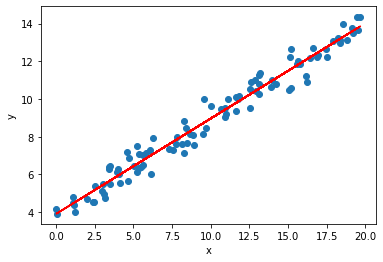

In [8]:
plt.scatter(x_train,y_obs)
plt.plot(x_train, θ[0] + θ[1]*x_train,color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [9]:
x_test = dist.uniform(20,25).rvs(n)

In [11]:
X_test = np.c_[np.ones(n),x_test]


In [12]:
sdiv = dist.norm(X_test.dot(θ),σ).rvs(n)

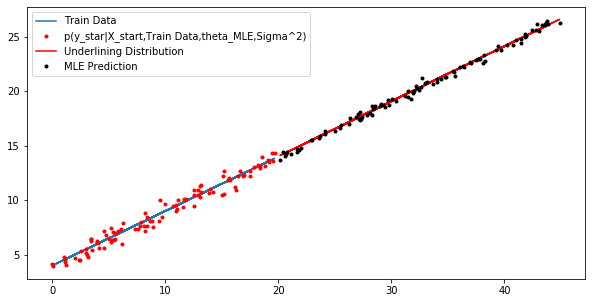

In [26]:
plt.figure(figsize=(10,5))
plt.plot(x_train,y1_true,label='Train Data')
plt.plot(x_train,y_obs,'.',c='r',label = 'p(y_star|X_start,Train Data,theta_MLE,Sigma^2)')
plt.plot(x_test, θ[0]+θ[1]*x_test,c='red',label='Underlining Distribution')
plt.plot(x_test,sdiv,'.',c='black',label='MLE Prediction')
plt.legend(loc='upper left')
plt.show()